# PDI - Trabalho 4

- Data: 11/2020
- Nome: Bruna Medeiros da Silva
- Matrícula: 16/0048711

- Professor: Renan Utida
- Matéria: Processamento Digital de Imagens

## Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

## Function - Connected component labeling

In [17]:
def image_invert(image, Bin = False):
    if(Bin):
        image[image == image.max()] = 255
    return abs(np.subtract(255, image))

def image_binarization(image, threshold = 1, background = 0, Bin = False):  
    if(len(image.shape) > 2):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    if(background == 1):
        image = image_invert(image, Bin = Bin)

    new_image = np.where(image > threshold, 1, image)
    new_image = np.where(image <= threshold, 0, image)
        
    return new_image.astype(np.uint8)

def neighbor_evaluate(image, row, col, neighborhood = 8):
    # using 8-neighborhood as default
    image_shape = image.shape
    neighbor = np.array([])

    if(row > 0):
        neighbor = np.concatenate([neighbor, [image[row - 1, col]]])     
    if(col > 0):
        neighbor = np.concatenate([neighbor, [image[row, col - 1]]])

    # To be used considering an 8-neighborhood
    if(neighborhood == 8):
        if(row > 0 and col < (image_shape[1] - 1)):
            neighbor = np.concatenate([neighbor, [image[row - 1, col + 1]]])        
        if(col > 0 and row > 0): 
            neighbor = np.concatenate([neighbor, [image[row - 1, col - 1]]])
    if(sum(neighbor) == 0):
        return 0, None # Show that there is not any neighbor greater than zero.
    
    labels = np.unique(neighbor[neighbor > 0])
    if(labels.max() != labels.min()):
        return labels.min(), {labels.max(): labels.min()}
    else:
        return labels.min(), None
    
    
def bin_ccl(image, neighborhood = 8, background = 0, threshold = 0, filtering = True,
            plot = True, top_space = 1.3, color_map = 'jet', figsize = [10, 10], figname = 'fig'):
    components = 0
    label = 0
    is_one = False
    image = np.array(image)
    
    if(len(image.shape) > 2):
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    n_rows, n_columns = image.shape
    
    if(filtering):
        image = image_binarization(image, background = background, threshold = threshold)
    
    label_image = np.copy(image)
    
    image_dict = {}
    conflict = None
    
    for i in range(n_rows):
        for j in range(n_columns):
            if(image[i][j] != 0):
                label, conflict = neighbor_evaluate(label_image, i, j, neighborhood = neighborhood)
                if(conflict is not None):
                    for old, new in conflict.items():
                        image_dict[old] = new
                if(not is_one):
                    if(label == 0):
                        components += 1
                        label = components
                    is_one = True
            else:
                label = 0
                is_one = False
            label_image[i][j] = label
        is_one = False
    for old, new in image_dict.items():
        label_image = np.where(label_image==old, new, label_image)
    comp_values = np.unique(label_image[label_image > 0])
    n_components = len(comp_values)
    
    if(plot):
        plt.figure()
        fig, axs = plt.subplots(1, 2, figsize = figsize)
        axs[0].imshow(image, cmap = 'gray', vmin = image.min(), vmax = image.max())
        axs[1].imshow(label_image, cmap = color_map, vmin = label_image.min(), vmax = label_image.max())
        fig.suptitle('Image with %d components' % n_components)
        fig.tight_layout()
        fig.subplots_adjust(top = top_space)
        plt.savefig('images/' + figname)
        plt.show()
#         plt.savefig('images/test1.png')

    return {'image': label_image, 'n_objects': n_components, 'obj_ids': comp_values}
                

<Figure size 432x288 with 0 Axes>

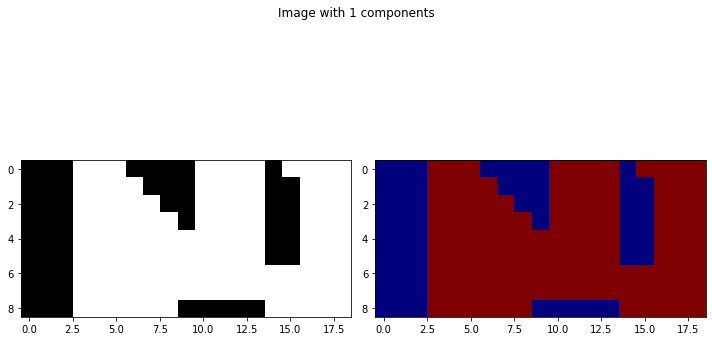

In [18]:
# image = [[0, 1, 0, 1, 0], [1, 0, 1, 0, 1], [1, 0, 0, 0, 1], [0, 1, 0, 1, 0], [0, 0, 1, 0, 0]]

# image = [[0, 0, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [0, 0, 0, 1, 1], [0 ,0, 0, 1, 1]]

# image = [[0, 0, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 1, 1, 0], [0, 0, 0, 1, 1], [0 ,0, 0, 1, 1]]

# image = [[0, 0, 0, 1, 1], [1, 1, 0, 0, 0], [1, 1, 0, 0, 0], [1, 1, 0, 1, 1], [1, 1, 0, 1, 1]]

# image = [[1, 1, 1, 0, 1], [1, 0, 1, 0, 0], [1, 1, 1, 0, 0], [0, 0, 0, 0, 0], [1 ,0, 0, 1, 1]]

# image = [[1, 1, 1, 0, 1], [1, 0, 1, 1, 1], [1, 1, 1, 0, 0], [0, 0, 0, 0, 0], [1 ,0, 0, 1, 1]]

image = [[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],  
         [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
         [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]

ccl_image = bin_ccl(image, filtering = False)

In [19]:
ccl_image['obj_ids']

array([1.])

## Applying to the required images

### 1st Figure

<Figure size 432x288 with 0 Axes>

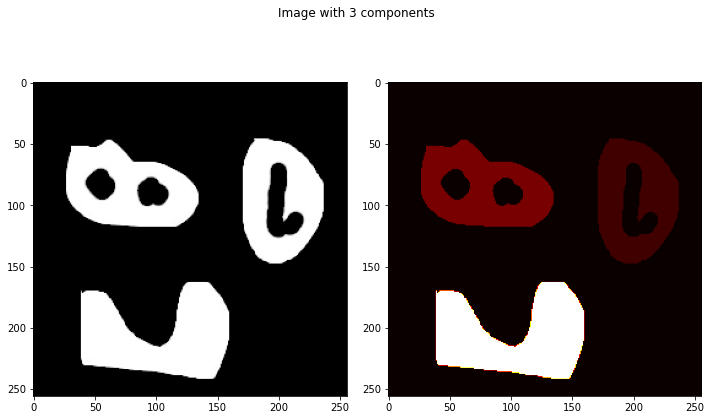

In [20]:
fig1 = cv2.imread("imagens_BW/fig1.jpg")
new_fig1 = image_binarization(fig1, threshold = 100, background = 1)
# plt.imshow(new_fig1, cmap = 'gray')
# k_data = np.ones([6, 6])
# kernel = np.array(k_data, np.uint8)
# # fig1 = cv2.dilate(fig1, kernel, iterations = 1)
# fig1 = cv2.morphologyEx(fig1, cv2.MORPH_CLOSE, kernel)


ccl_fig1 = bin_ccl(new_fig1, filtering = False, neighborhood = 8, color_map = 'hot', figname = 'fig1')

### 2nd Figure

<Figure size 432x288 with 0 Axes>

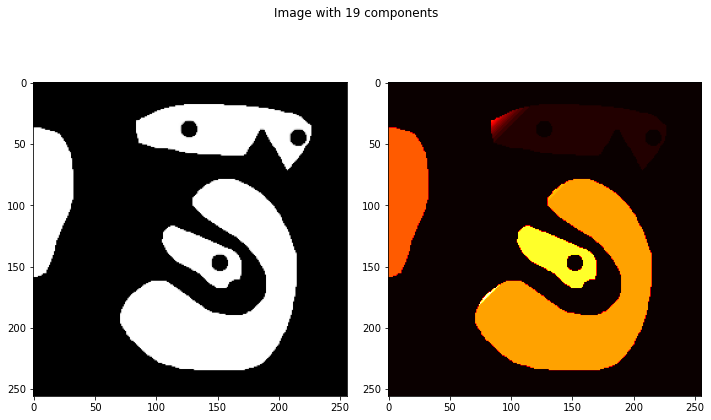

In [21]:
fig2 = cv2.imread("imagens_BW/fig2.jpg")
fig2 = image_binarization(fig2, background = 1, threshold = 180)

# k1_data = [[1, 1, 1, 1, 1]]
# k1_data = [[0, 1], [1, 0]]
k1_data = np.ones([4, 3])
kernel1 = np.array(k1_data, np.uint8)

# k2_data = np.ones([10, 10])
# kernel2 = np.array(k2_data, np.uint8)

# fig2 = cv2.morphologyEx(fig2, cv2.MORPH_OPEN, kernel1)
fig2 = cv2.morphologyEx(fig2, cv2.MORPH_CLOSE, kernel1)
# fig2 = cv2.dilate(fig2, kernel1, iterations = 2)
# fig2 = cv2.erode(fig2, kernel1, iterations = 2)



# plt.imshow(fig2)
ccl_fig2 = bin_ccl(fig2, neighborhood = 8, filtering = False, color_map = 'hot', figname = 'fig2')

### 3rd Figure 

<Figure size 432x288 with 0 Axes>

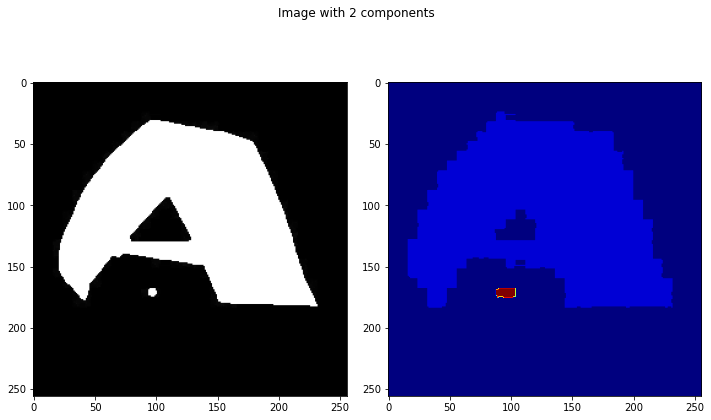

In [22]:
fig3 = cv2.imread("imagens_BW/fig3.jpg")
fig3 = image_binarization(fig3, background = 1, threshold = 0)

# k_data = [[0, 1, 0], [1, 0, 1], [0, 1, 0]]
# k_data = [[0, 1], [0, 0]]
k_data = np.ones([3, 3])
kernel = np.array(k_data, np.uint8)

# fig3 = cv2.dilate(fig3, kernel, iterations = 2)
# fig3 = cv2.erode(fig3, kernel, iterations = 2)
# fig3 = cv2.morphologyEx(fig3, cv2.MORPH_OPEN, kernel)
fig3 = cv2.morphologyEx(fig3, cv2.MORPH_CLOSE, kernel)

ccl_fig3 = bin_ccl(fig3, background = 1, neighborhood = 8, filtering = False, figname = 'fig3')

### 4th Figure

<Figure size 432x288 with 0 Axes>

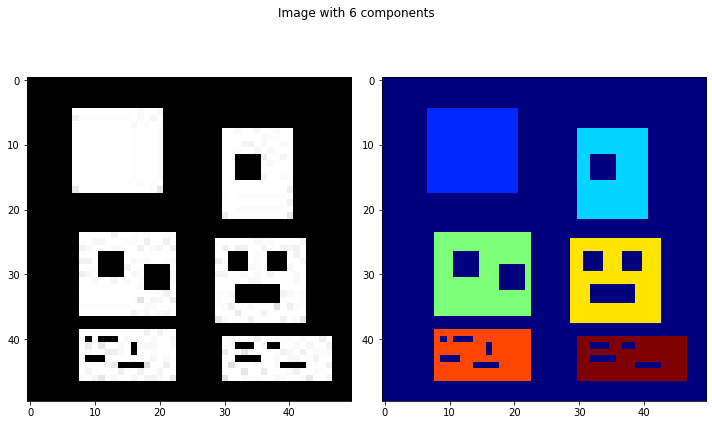

In [23]:
fig4 = cv2.imread("imagens_BW/fig4.jpg")

ccl_fig4 = bin_ccl(fig4, background = 1, neighborhood = 8, threshold = 100, figname = 'fig4')

### Component Type

In [24]:
def get_components(ccl_fig, tol = 4):
    image = ccl_fig['image']
    img_shape = image.shape 
    objects = []
    
    for comp in range(ccl_fig['n_objects']):
        obj =  np.zeros(img_shape)
        for i in range(img_shape[0]):
            for j in range(img_shape[1]):
                if(image[i][j] == ccl_fig['obj_ids'][comp]):
                    obj[i][j] = image[i][j]

        x_lim = [img_shape[0], 0]
        y_lim = [img_shape[1], 0]

        for i in range(img_shape[0]):
            for j in range(img_shape[1]):
                if(obj[i][j] != 0):
                    if(i < x_lim[0]):
                        x_lim[0] = i
                    elif(i > x_lim[1]):
                        x_lim[1] = i
                    if(j < y_lim[0]):
                        y_lim[0] = j
                    elif(j > y_lim[1]):
                        y_lim[1] = j
        x_lim[0] -= tol
        y_lim[0] -= tol
        x_lim[1] += tol
        y_lim[1] += tol

        obj = obj[x_lim[0]: x_lim[1], y_lim[0]: y_lim[1]]
        objects.append(obj)
    return objects


def hole_detect(ccl_fig, tol = 4, gradient = True, k_data = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]):
    n_outlines = []
    new_objects = []
    objects = get_components(ccl_fig)
    kernel = np.array(k_data, np.uint8)
    
    for obj in objects:
        if(gradient):
            obj = cv2.morphologyEx(obj, cv2.MORPH_GRADIENT, kernel)
        obj = image_binarization(obj, background=0, threshold = 0, Bin = True)
        fig_ccl = bin_ccl(obj, filtering = False, plot = False)
        n_outlines.append(fig_ccl['n_objects'] - 1)
        new_objects.append(fig_ccl['image'])
    return {'objects': new_objects, 'holes': n_outlines}


<Figure size 432x288 with 0 Axes>

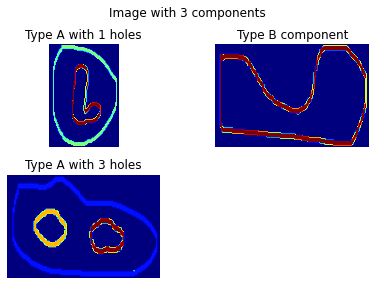

In [25]:
figure = ccl_fig1
result = hole_detect(figure, k_data = np.ones([5, 2]))

plt.figure()
fig, axs = plt.subplots(2, int((1 + figure['n_objects'] / 2)))

for idx in range(int(np.ceil(figure['n_objects']/2))):
    axs[0][idx].imshow(result['objects'][idx*2], cmap = 'jet')
    
    if(result['holes'][idx*2] != 0):
        axs[0][idx].set_title("Type A with %d holes" % result['holes'][idx*2])
    else:
        axs[0][idx].set_title("Type B component")
        
    axs[0][idx].axis('off')
    
    if((idx*2 + 1) < figure['n_objects']):
        axs[1][idx].imshow(result['objects'][idx*2 + 1], cmap = 'jet')
        
        if(result['holes'][idx*2 + 1] != 0):
            axs[1][idx].set_title("Type A with %d holes" % result['holes'][idx*2 + 1])
        else:
            axs[1][idx].set_title("Type B")        

        axs[1][idx].axis('off')
    else:
        fig.delaxes(axs[1][idx])
fig.suptitle('Image with %d components' % figure['n_objects'])
fig.tight_layout()
fig.subplots_adjust(top = 0.85)
plt.savefig('images/ccl_fig1')
plt.show()

<Figure size 432x288 with 0 Axes>

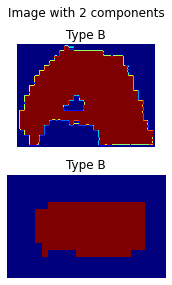

In [26]:
figure = ccl_fig3
result = hole_detect(figure, gradient = False, k_data = np.ones([3, 3]))

plt.figure()
fig, axs = plt.subplots(2, int((figure['n_objects'] / 2)))

for idx in range(int(np.ceil(figure['n_objects']/2))):
    axs[0].imshow(result['objects'][idx*2], cmap = 'jet')
    
    if(result['holes'][idx*2] != 0):
        axs[0].set_title("Type A with %d holes" % result['holes'][idx*2])
    else:
        axs[0].set_title("Type B")
        
    axs[0].axis('off')
    
    if((idx*2 + 1) < figure['n_objects']):
        axs[1].imshow(result['objects'][idx*2 + 1], cmap = 'jet')
        
        if(result['holes'][idx*2 + 1] != 0):
            axs[1].set_title("Type A with %d holes" % result['holes'][idx*2 + 1])
        else:
            axs[1].set_title("Type B")        

        axs[1].axis('off')
    else:
        fig.delaxes(axs[1][idx])
fig.suptitle('Image with %d components' % figure['n_objects'])
fig.tight_layout()
fig.subplots_adjust(top = 0.85)
plt.savefig('images/ccl_fig3')
plt.show()

<Figure size 432x288 with 0 Axes>

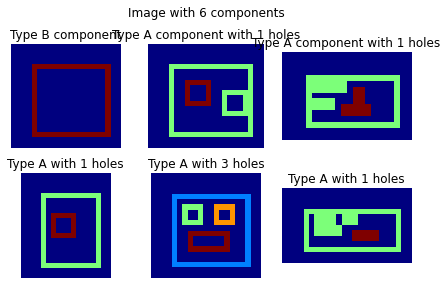

In [27]:
figure = ccl_fig4
# figure = cv2.morphologyEx(figure, cv2.MORPH_OPEN, np.array(np.ones([2, 2]), np.uint8))
result = hole_detect(figure, gradient = True, k_data = np.ones([2, 2]))

plt.figure()
fig, axs = plt.subplots(2, int((figure['n_objects'] / 2)))

for idx in range(int(np.ceil(figure['n_objects']/2))):
    axs[0][idx].imshow(result['objects'][idx*2], cmap = 'jet')
    
    if(result['holes'][idx*2] != 0):
        axs[0][idx].set_title("Type A component with %d holes" % result['holes'][idx*2])
    else:
        axs[0][idx].set_title("Type B component")
        
    axs[0][idx].axis('off')
    
    if((idx*2 + 1) < figure['n_objects']):
        axs[1][idx].imshow(result['objects'][idx*2 + 1], cmap = 'jet')
        
        if(result['holes'][idx*2 + 1] != 0):
            axs[1][idx].set_title("Type A with %d holes" % result['holes'][idx*2 + 1])
        else:
            axs[1][idx].set_title("Type B")        

        axs[1][idx].axis('off')
    else:
        fig.delaxes(axs[1][idx])
fig.suptitle('Image with %d components' % figure['n_objects'])
fig.tight_layout()
fig.subplots_adjust(top = 0.85)
plt.savefig('images/ccl_fig4')
plt.show()